## Material: 
https://github.com/Abdel-Razzak/ADS/blob/Module-3-%26-4-Supervised-learning/slides/Intro%20to%20Tree%20Methods.pdf
https://github.com/Abdel-Razzak/ADS/blob/Module-3-%26-4-Supervised-learning/Decision%20Trees%20and%20Random%20Forests%20in%20Python.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('data_sets/kyphosis.csv')

In [15]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

In [4]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

## EDA

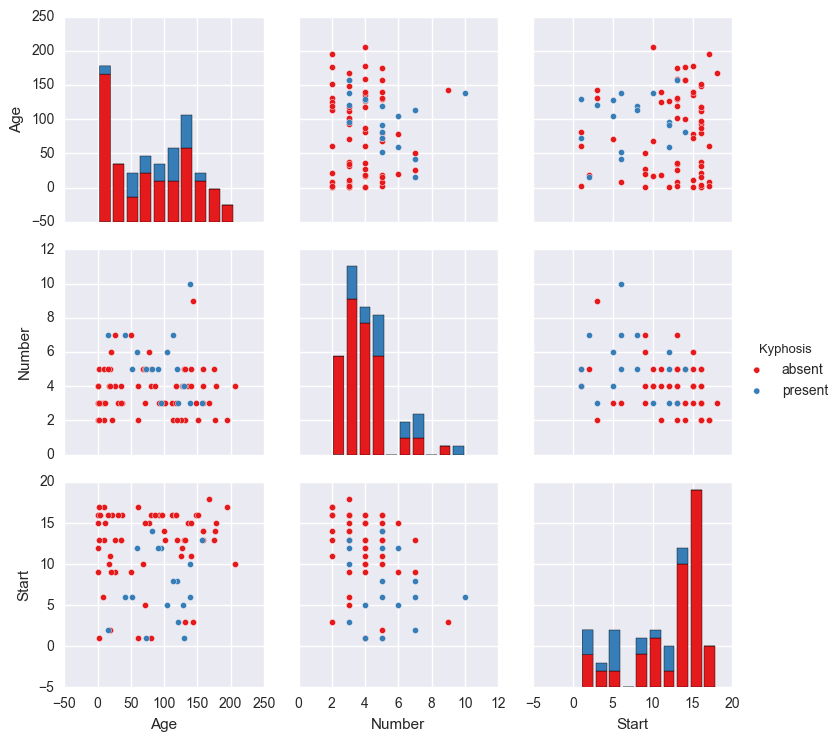

In [10]:
# To understand which feautures give the least overlapping representation of the data
sns.pairplot(df,hue='Kyphosis',palette='Set1')

##### In the above case, looks like 'Number' and 'Start' give good seperation for the data 

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
dtree = DecisionTreeClassifier()

In [23]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Prediction and Evaluation

In [24]:
predictions = dtree.predict(X_test)

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.82      0.90      0.86        20
    present       0.33      0.20      0.25         5

avg / total       0.72      0.76      0.74        25



In [27]:
print(confusion_matrix(y_test,predictions))

[[18  2]
 [ 4  1]]


### Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [29]:
rfc_pred = rfc.predict(X_test)

In [30]:
print(confusion_matrix(y_test,rfc_pred))

[[17  3]
 [ 4  1]]


In [32]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.81      0.85      0.83        20
    present       0.25      0.20      0.22         5

avg / total       0.70      0.72      0.71        25

